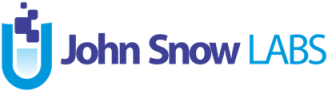

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/OpenbookQA_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [4]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## OpenBookQA
[OpenBookQA Dataset](https://allenai.org/data/open-book-qa)

**Dataset Summary**

OpenBookQA is a new kind of question-answering dataset modeled after open book exams for assessing human understanding of a subject. It consists of 5,957 multiple-choice elementary-level science questions (4,957 train, 500 dev, 500 test), which probe the understanding of a small “book” of 1,326 core science facts and the application of these facts to novel situations. For training, the dataset includes a mapping from each question to the core science fact it was designed to probe. Answering OpenBookQA questions requires additional broad common knowledge, not contained in the book. The questions, by design, are answered incorrectly by both a retrieval-based algorithm and a word co-occurrence algorithm. Strong neural baselines achieve around 50% on OpenBookQA, leaving a large gap to the 92% accuracy of crowd-workers.

**Data Splits**

- `test` : Testing set from the OpenBookQA dataset, containing 500 multiple-choice elementary-level science questions
- `test-tiny` :	OpenBookQA Dataset	Truncated version of the test set from the OpenBookQA dataset, containing 50 multiple-choice examples.

### Setup and Configure Harness

In [5]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"OpenBookQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [6]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [7]:
harness.data = harness.data[:15]

### Generating the test cases.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4359.98it/s]


In [9]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...
...,...,...,...,...,...,...
70,robustness,add_speech_to_text_typo,-,It's easier for human's to survive in:\n\nA. a...,-,Its easier for human's to survive inn:\n\nAe. ...
71,robustness,add_speech_to_text_typo,-,A cactus stem is used to store\n\nA. fruit\nB....,-,A cactus stemm is used to store\n\nA.. fruit\n...
72,robustness,add_speech_to_text_typo,-,A red-tailed hawk is searching for prey. It is...,-,A red-tailed hauck is searching for prey. It i...
73,robustness,add_speech_to_text_typo,-,The chance of wildfires is increased by\n\nA. ...,-,The chance of wildfires is increased bae\n\nAe...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [10]:
harness.run()

Running testcases... : 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [11]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,A person wants to start saving money so that t...,-,A PERSON WANTS TO START SAVING MONEY SO THAT T...,B. quit eating lunch out,B. QUIT EATING LUNCH OUT,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n...,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND: A...,A. a marsh,A. A Marsh,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunni...,-,PREDATORS EAT A. LIONS B. HUMANS C. BUNNIES D....,A. lions,A. Lions,True
3,robustness,uppercase,-,Oak tree seeds are planted and a sidewalk is p...,-,OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...,C. parts may break the concrete,C. PARTS MAY BREAK THE CONCRETE,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. ...,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA A. GAS...,C. electrical conductors,C. ELECTRICAL CONDUCTORS,True
...,...,...,...,...,...,...,...,...,...
70,robustness,add_speech_to_text_typo,-,It's easier for human's to survive in:\n\nA. a...,-,Its easier for human's to survive inn:\n\nAe. ...,C. a town,C. a town,True
71,robustness,add_speech_to_text_typo,-,A cactus stem is used to store\n\nA. fruit\nB....,-,A cactus stemm is used to store\n\nA.. fruit\n...,B. liquid,C. food,False
72,robustness,add_speech_to_text_typo,-,A red-tailed hawk is searching for prey. It is...,-,A red-tailed hauck is searching for prey. It i...,D. a deer,A. an eagle,False
73,robustness,add_speech_to_text_typo,-,The chance of wildfires is increased by\n\nA. ...,-,The chance of wildfires is increased bae\n\nAe...,A. parched foliage,A. parched foliage,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [12]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,2,13,87%,66%,True
1,robustness,dyslexia_word_swap,1,14,93%,60%,True
2,robustness,add_abbreviation,2,13,87%,60%,True
3,robustness,add_slangs,3,12,80%,60%,True
4,robustness,add_speech_to_text_typo,8,7,47%,60%,False


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [13]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"OpenBookQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [14]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [15]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6754.11it/s]


In [16]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rouge2_score,male
4,fairness,min_gender_rouge2_score,female
5,fairness,min_gender_rouge2_score,unknown
6,fairness,min_gender_rougeL_score,male
7,fairness,min_gender_rougeL_score,female
8,fairness,min_gender_rougeL_score,unknown
9,fairness,min_gender_rougeLsum_score,male


### Running the tests

In [17]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 24/24 [01:19<00:00,  1.38s/it]

### Generated Results

In [18]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.907937,True
1,fairness,min_gender_rouge1_score,female,0.66,0.764706,True
2,fairness,min_gender_rouge1_score,unknown,0.66,1.000000,True
3,fairness,min_gender_rouge2_score,male,0.60,0.866667,True
4,fairness,min_gender_rouge2_score,female,0.60,0.764706,True
5,fairness,min_gender_rouge2_score,unknown,0.60,1.000000,True
6,fairness,min_gender_rougeL_score,male,0.66,0.907937,True
7,fairness,min_gender_rougeL_score,female,0.66,0.764706,True
8,fairness,min_gender_rougeL_score,unknown,0.66,1.000000,True
9,fairness,min_gender_rougeLsum_score,male,0.66,0.907937,True


### Final Results

In [19]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,0,3,100%,65%,True
1,fairness,min_gender_rouge2_score,0,3,100%,65%,True
2,fairness,min_gender_rougeL_score,0,3,100%,65%,True
3,fairness,min_gender_rougeLsum_score,0,3,100%,65%,True
4,fairness,max_gender_rouge1_score,3,0,0%,65%,False
5,fairness,max_gender_rouge2_score,3,0,0%,65%,False
6,fairness,max_gender_rougeL_score,3,0,0%,65%,False
7,fairness,max_gender_rougeLsum_score,3,0,0%,65%,False


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [20]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"OpenBookQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [21]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [22]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 3292.23it/s]


In [23]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score
3,accuracy,min_bleu_score
4,accuracy,min_rouge2_score
5,accuracy,min_rougeLsum_score


### Running the tests

In [24]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... :  50%|█████     | 3/6 [00:30<00:22,  7.35s/it]

Running testcases... : 100%|██████████| 6/6 [00:38<00:00,  6.35s/it]


### Generated Results

In [25]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.720000,False
1,accuracy,min_rouge1_score,0.8,0.792381,False
2,accuracy,min_rougeL_score,0.8,0.793333,False
3,accuracy,min_bleu_score,0.8,0.844053,True
4,accuracy,min_rouge2_score,0.8,0.780000,False
5,accuracy,min_rougeLsum_score,0.8,0.792381,False


### Final Results

In [26]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,0,1,100%,65%,True
4,accuracy,min_rouge2_score,1,0,0%,65%,False
5,accuracy,min_rougeLsum_score,1,0,0%,65%,False
